Nuhan Gunasekara - HNDDS241 - 013

# Data Collection and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Nuhan\Documents\NIBM\MH1.csv")
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Standardizing gender values based on presence of 'male' or 'female'
removing extra spaces

lower case

any male = Male

any female = Female

In [3]:
def standardize_gender(gender):
    gender = gender.strip().lower()
    if re.search(r'male', gender):
        return 'male'
    elif re.search(r'female', gender):
        return 'female'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(standardize_gender)

In the dataset's gender column, there are 41 different gender options, such as "Agender, Cis Male, Cis Female, All, Queer, etc." Additionally, there are variations in capitalization, extra spaces, and spelling errors in some values. As a result, I created a function to standardize this column.

This function standardizes gender values in the dataset by removing extra spaces, converting text to lowercase, and categorizing entries containing "male" as 'male' and those containing "female" as 'female'. All other entries are categorized as 'other'.

## Removing Date entries from no_employees column

In [4]:
def is_date(entry):
    return bool(re.search(r'\d{1,2}-[a-zA-Z]{3}', entry))

df = df[~df['no_employees'].apply(is_date)]

I found incorrect entries (dates) in the 'no_employees' column. Since inaccurate data can distort the model's understanding and lead to poor performance, those values should be removed. 

This function helps us identify and remove entries that incorrectly contain dates in the 'no_employees' column.

In [5]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1,44,other,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
8,42,male,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


## Removing Duplicates and Outliers

In [6]:
df = df.drop_duplicates()

This line removes any duplicate rows in the dataset. Duplicate data can lead to biased or misleading results, and it's important to ensure each entry is unique.

In [7]:
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
df.loc[(df['Age']> upper_limit) | (df['Age']< lower_limit)]
df = df.loc[(df['Age'] < upper_limit) & (df['Age'] > lower_limit)]

According to the research paper, "Outlier detection and removal help in achieving a more generalized model by preventing extreme values from disproportionately influencing the training process" 

Therefore, I calculate the upper and lower limits for the 'Age' column using the mean and standard deviation. It then filters out any data points outside these limits, effectively removing outliers.

In [8]:
df.shape

(805, 24)

In [9]:
df.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [10]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1,44,other,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
8,42,male,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


# Data Visualizing

## Origin country of the employees who take the survey

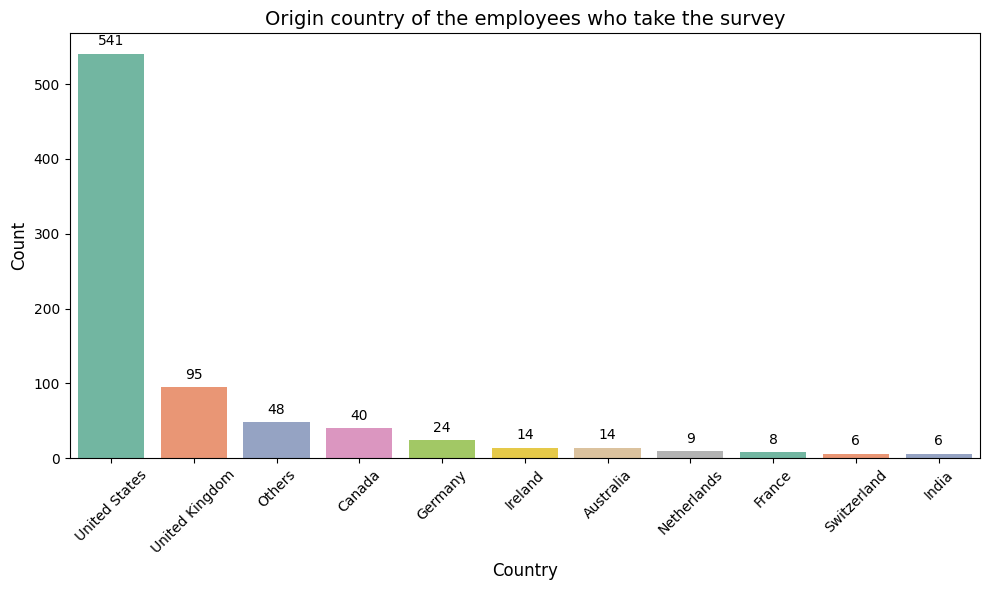

In [11]:
# List of countries to keep as individual bars
main_countries = ['United States', 'Canada', 'United Kingdom', 
                  'Netherlands', 'France', 'Australia', 
                  'Germany', 'Ireland', 'Switzerland', 'India']

# Create a new column that groups countries into "Others" if not in the main list
df['Country_grouped'] = df['Country'].apply(lambda x: x if x in main_countries else 'Others')

# Plotting the country distribution with grouped data
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df, x='Country_grouped', order=df['Country_grouped'].value_counts().index, palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),  
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', xytext=(0, 9), textcoords='offset points')  

plt.title('Origin country of the employees who take the survey', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The column "country" is excluded to prevent any potential bias, as this figure illustrates a majority of respondents originating from the United States. 

## Age distribution of the employees

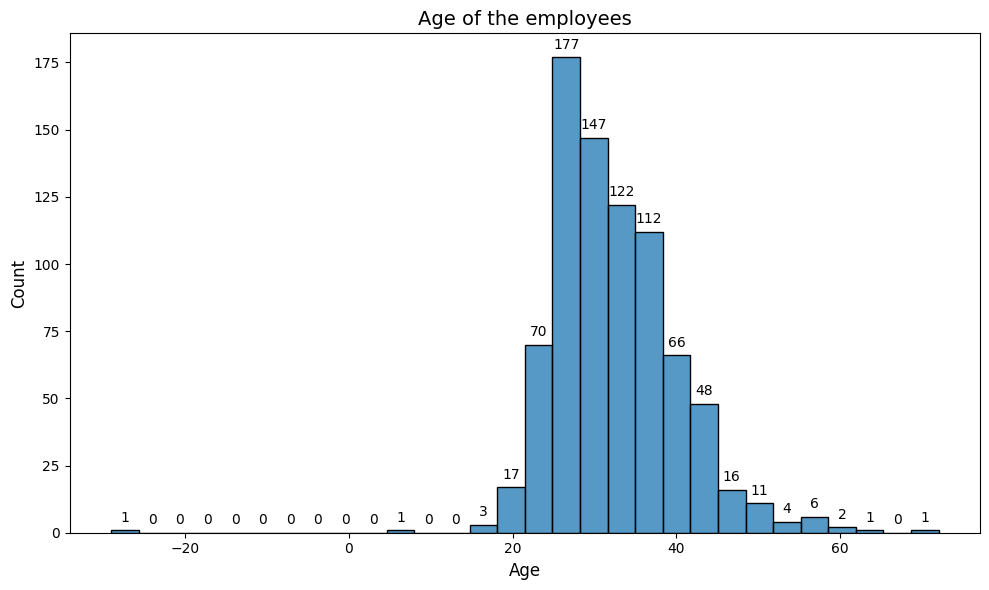

In [12]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=df, x='Age', bins=30, kde=False) 

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='center', xytext=(0, 9), textcoords='offset points')  

plt.title('Age of the employees', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In this figure, the “age” column exhibits outliers such as negative years old, 5 years old which are illogical as human age cannot be negative and it is unlikely for a 5-year-old to be employed. The mentioned outliers in the “age” column will replaced with the median of the column. 

## Family History and Treatment 

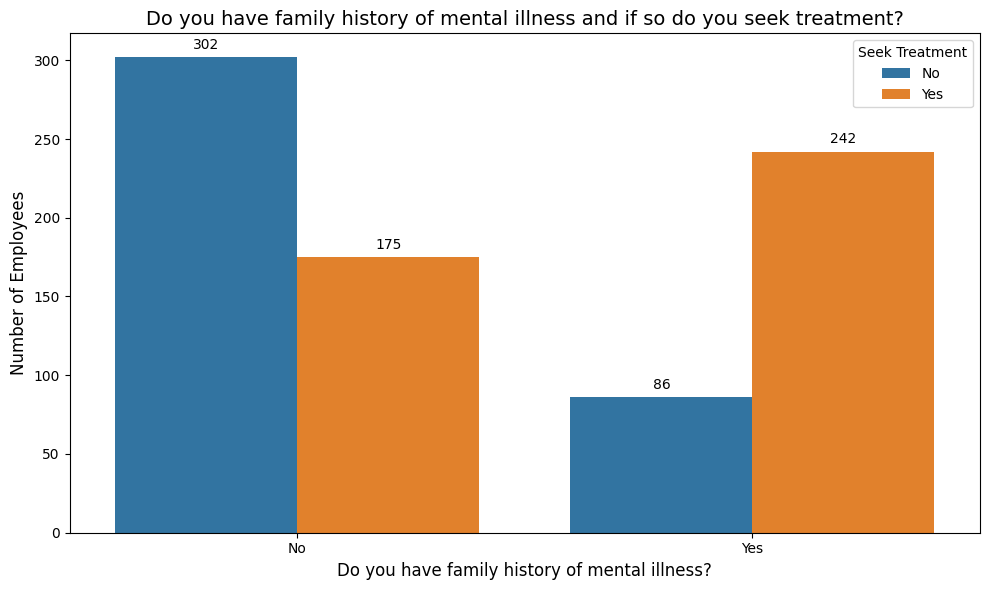

In [13]:
# Group the data by 'family_history' and 'treatment' to count how many employees seek treatment or not.
treatment_counts = df.groupby(['family_history', 'treatment']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='family_history', y='counts', hue='treatment', data=treatment_counts)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),  
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Do you have family history of mental illness and if so do you seek treatment?', fontsize=14)
plt.xlabel('Do you have family history of mental illness?', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Seek Treatment')
plt.tight_layout()
plt.show()

## Concern of Mental Health vs Physical Health 

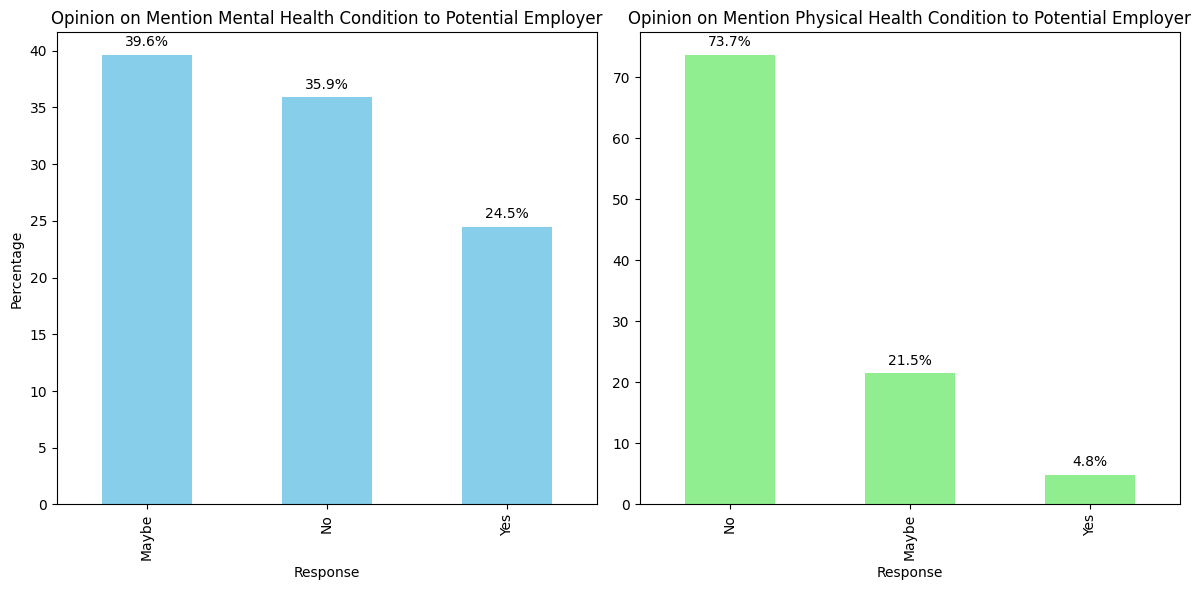

In [14]:
# Data for mental health condition opinion
mental_health_data = df['mental_health_consequence'].value_counts(normalize=True) * 100

# Data for physical health condition opinion
physical_health_data = df['phys_health_consequence'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))

# Plot for mental health
plt.subplot(1, 2, 1)
mental_plot = mental_health_data.plot(kind='bar', color='skyblue')
plt.title('Opinion on Mention Mental Health Condition to Potential Employer')
plt.ylabel('Percentage')
plt.xlabel('Response')
for p in mental_plot.patches:
    mental_plot.annotate(format(p.get_height(), '.1f') + '%', 
                         (p.get_x() + p.get_width() / 2., p.get_height()),  
                         ha='center', va='center', xytext=(0, 9), textcoords='offset points')  

# Plot for physical health
plt.subplot(1, 2, 2)
physical_plot = physical_health_data.plot(kind='bar', color='lightgreen')
plt.title('Opinion on Mention Physical Health Condition to Potential Employer')
plt.xlabel('Response')
for p in physical_plot.patches:
    physical_plot.annotate(format(p.get_height(), '.1f') + '%',  
                           (p.get_x() + p.get_width() / 2., p.get_height()),  
                           ha='center', va='center', xytext=(0, 9), textcoords='offset points')  

plt.tight_layout()
plt.show()


## Company Healthcare Benefits and Treatment 

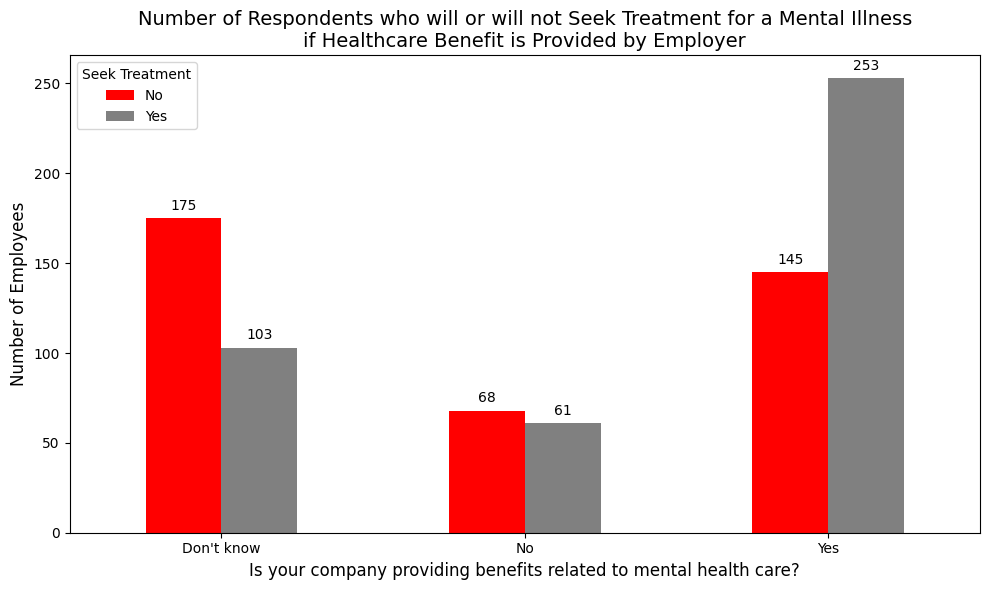

In [15]:
pivot_df = df.pivot_table(index='benefits', columns='treatment', aggfunc='size', fill_value=0)

plot = pivot_df.plot(kind='bar', stacked=False, color=['red', 'grey'], figsize=(10, 6))

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9), textcoords='offset points') 

plt.title('Number of Respondents who will or will not Seek Treatment for a Mental Illness\nif Healthcare Benefit is Provided by Employer', fontsize=14)
plt.xlabel('Is your company providing benefits related to mental health care?', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Seek Treatment', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## Number of Respondent Ready or Not Ready to inform their Supervisor about their Mental Illness 

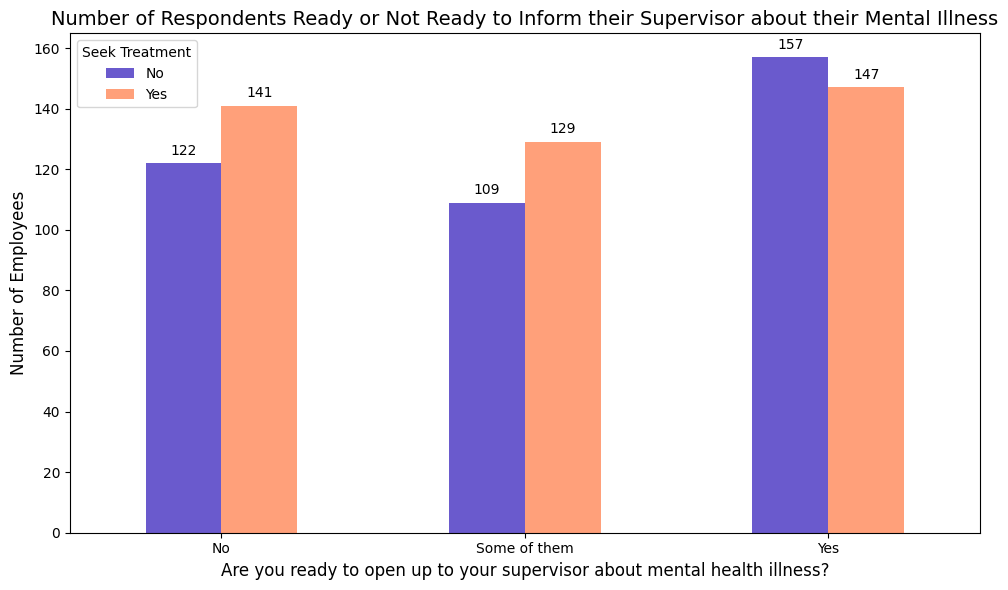

In [16]:
# Create a pivot table to count occurrences
pivot_df = df.pivot_table(index='supervisor', columns='treatment', aggfunc='size', fill_value=0)

plot = pivot_df.plot(kind='bar', stacked=False, color=['slateblue', 'lightsalmon'], figsize=(10, 6))

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='center', xytext=(0, 9), textcoords='offset points')  

plt.title('Number of Respondents Ready or Not Ready to Inform their Supervisor about their Mental Illness', fontsize=14)
plt.xlabel('Are you ready to open up to your supervisor about mental health illness?', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Seek Treatment', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Model Pipeline Development

## Define the features and target variable

In [17]:
X = df.drop('treatment', axis=1)
y = df['treatment']

The X variable contains all the features except the 'treatment' column, which is our target variable. The target variable y is the outcome we want to predict.

## Convert target variable to numerical format

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Label encoding ensures that the target variable is in a format suitable for the model to process, helping in classification tasks.

Since machine learning models often require numerical input, the target variable y is converted from categorical to numerical format using LabelEncoder.

## Numerical processing pipeline

In [19]:
numerical_processor = Pipeline(
    steps = [("imputation_mean",SimpleImputer(missing_values = np.nan,strategy='mean')),
            ("std_scaler", StandardScaler())]
)
numerical_processor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('std_scaler', StandardScaler())])

The Numerical Processing Pipeline handles preprocessing for all numerical features in the dataset.

SimpleImputer replaces any missing numerical values with the mean of the column. This is a common strategy to handle missing data without introducing bias.

$$
\text{Imputed Value} = \frac{\sum X}{n}
$$


where:

- ( $\sum X$ )  is the sum of non-missing values
- ( $ n $ ) is the count of non-missing values




StandardScaler standardizes the numerical data by subtracting the mean and scaling to unit variance. This is important because features with different scales can adversely affect the performance of machine learning models.

$$
Z = \frac{X - \mu}{\sigma}
$$

where:

- \( $\mu$ \) is the mean
- \( $\sigma$ \) is the standard deviation


## Categorical processing pipeline

In [20]:
categorical_processor = Pipeline(
    steps = [("imputation_constant",SimpleImputer(fill_value = "missing", strategy = "constant")),
             ("onehot", OneHotEncoder(handle_unknown = "ignore"))        
    ]
)
categorical_processor

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

The Categorical Processing Pipeline manages preprocessing for categorical features.

The SimpleImputer fills missing categorical values with a constant, here set as "missing". This is useful for ensuring that missing values are represented uniformly.

The OneHotEncoder converts categorical variables into a series of binary (0 or 1) variables. This transformation is crucial because machine learning models require categorical data to be converted into a numerical format that the model can interpret effectively.

In [21]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_grouped'],
      dtype='object')

## Creating Preprocessor


In [22]:
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Gender', 'Country', 'self_employed', 'family_history',
                                            'work_interfere', 'no_employees', 'remote_work','tech_company',
                                            'benefits', 'care_options', 'wellness_program','seek_help', 
                                            'anonymity', 'leave', 'mental_health_consequence','phys_health_consequence',
                                            'coworkers', 'supervisor','mental_health_interview', 'phys_health_interview',
                                            'mental_vs_physical', 'obs_consequence']),
     ("numerical", numerical_processor,["Age"])
    ]
)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Country', 'self_employed',
                                  'family_history', 'work_interfere',
                                  'no_employees', 'remote_work', 'tech_company',
                                  'benefits', 'care_options',
                                  'wellness_program', 'seek_help', 'anonymity',
                                  'leave', 'mental_health_consequence',
                                  'phys_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview',
                                  'phys_health_interview', 'mental_vs_physical',
                                  'obs_consequence']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Age'])])

I used the ColumnTransformer to combine both numerical and categorical processing pipelines above created. It applies the categorical_processor to the specified categorical columns and the numerical_processor to the numerical 'Age' column.

This approach ensures that each type of numerical and categorical features are processed appropriately before being fed into the machine learning models. 

## Model Pipelines

In [23]:
pipelines = {
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier()),
    "Logistic Regression": make_pipeline(preprocessor, LogisticRegression(max_iter=1000)),
    "KNN": make_pipeline(preprocessor, KNeighborsClassifier())
}

In here, I defined pipelines for several machine learning models, each starting with the preprocessor and followed by the respective model.

### Random Forest:

   - An ensemble method used for classification and regression tasks from creating multiple decision trees and merges them to get a more accurate and stable prediction.
    
   - The creation of a Random Forest begins with selecting a random data sample from the original dataset, commonly referred to as bootstrapping. With this bootstrapped sample of data as a foundation, a Decision Tree is then developed with a portion of features randomly picked at each split. A forest of Decision Trees is generated by repeatedly executing this strategy.<br>
<br>    
   - Classification: For a new data point, each decision tree in the forest makes a prediction. The final class label is determined by majority voting (i.e., the class that gets the most votes from the trees).
   - Regression: For a new data point, each decision tree makes a prediction, and the final prediction is the average of all the tree predictions.<br>
<br>    
   - The Gini Index, Entropy, and Mean Squared Error (MSE) are metrics used for evaluating different aspects of machine learning models, particularly in classification and regression tasks. 
   
---------------------------------------------------------------------------------------------------------------------------
                                               Gini Index (for classification)
The Gini index measures the impurity of a node. It is given by:

$$
Gini(p) = 1 - \sum_{i=1}^{k} p_i^2
$$

where \( $p_i$ \) is the proportion of samples belonging to class \( $i$ \), and \( $k$ \) is the number of classes.

---------------------------------------------------------------------------------------------------------------------------

                                                Entropy (for classification)

Entropy measures the disorder or impurity of a node. It is given by:

$$
Entropy(p) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

where \( $p_i$ \) is the proportion of samples belonging to class \( $i$ \), and \( $k$ \) is the number of classes.

---------------------------------------------------------------------------------------------------------------------------

                                           Mean Squared Error (MSE) (for regression)

The MSE is a measure of the average squared difference between the predicted and actual values. It is given by:

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where \( $y_i$ \) is the actual value, \( $\hat{y}_i$ \) is the predicted value, and \( $N$ \) is the number of samples.


### Logistic Regression:

- A linear model used for binary classification tasks, where the output is the probability of a particular class.
- The fundamental principle of Logistic Regression is to model the probability of the dependent variable belonging to a particular class using the logistic function, also known as the sigmoid function. The logistic function is an S-shaped curve that maps any real-valued number into the interval (0, 1), making it suitable for probability prediction.
                            
---------------------------------------------------------------------------------------------------------------------------
                                                   Sigmoid Function Formula
$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}
$$


where:

- \( $p$ \) is the probability that the dependent variable belongs to a particular class (e.g., class 1).
- \( $e$ \) is the base of the natural logarithm (approximately equal to 2.718).
- \( $\beta_0, \beta_1, \dots, \beta_n$ \) are the regression coefficients (parameters) for the model.
- \( $x_1, x_2, \dots, x_n$ \) are the independent variables (features).
---------------------------------------------------------------------------------------------------------------------------

- The goal of logistic regression is to find the best-fitting parameters $\beta_0, \beta_1, \dots, \beta_n$ that describe the relationship between the independent variables and the probability of the dependent variable. 
- To make a final classification decision (e.g., class 0 or class 1), a threshold is applied. Typically, 0.5 is used as the threshold:
    - If $p>0.5$, predict class is 1.
    - If $p≤0.5$, predict class is 0.<br>
<br>    
- Types of Logistic Regression
    - Binary Logistic Regression: When the dependent variable has two possible outcomes (e.g., yes/no).
    - Multinomial Logistic Regression: When the dependent variable has more than two categories.<br>
<br>    
- When deploying the model pipeline for the logistic regression model, the research paper did not specifically mention the iteration count. In order to prioritize model accuracy and convergence while remaining adaptable to further tuning, I used 1000 iterations. This decision ensures that the logistic regression model is robust and comparable, ultimately leading to more reliable and valid results.

### KNN (K-Nearest Neighbors):
- A non-parametric model that classifies data points based on their proximity to other labeled data points.
- KNN can used for both classification and regression tasks in machine learning. The basic idea behind KNN is to classify or predict the outcome for a new data point based on its proximity to existing data points in the dataset.
    1. Proximity-Based Classification: KNN relies on the concept of proximity, meaning it predicts the class or value of a new data point by finding the most similar data points in the training set.
    2. Lazy Learning: KNN is considered a lazy learning algorithm because it doesn’t build an explicit model during the training phase. Instead, it stores the entire training dataset and only makes calculations when a prediction is required.<br>

<h4>KNN works by following these steps</h4>

  1. Choosing the K Value: 
     - The first step is to choose the number of neighbors, denoted as $𝑘$, that will be considered for classification or prediction. This value significantly impacts the performance of the model.
  2. Calculating Distance: 
      - The algorithm calculates the distance between the new data point and all the points in the training set. Several distance metrics can be used, with Euclidean distance being the most common.
  3. Identifying Nearest Neighbors: 
     - After calculating the distances, the algorithm identifies the k-nearest training data points that are closest to the new observation.
  4. Classifying or Predicting:
     - For classification tasks, the algorithm assigns the most frequent class (majority vote) among the k-nearest neighbors to the new data point.
     - For regression tasks, it calculates the average of the values of the k-nearest neighbors to predict the value for the new observation.
  5. Repeat for Each New Observation:
     - This process is repeated for each new data point that needs to be classified or predicted.
     
<h4>Distance Metrics</h4>

The performance of KNN largely depends on the distance metric used to measure similarity between data points. Followings are the most common distance metrics.
1. Euclidean Distance:
   - Euclidean distance is the straight-line distance between two points in multi-dimensional space.
 $$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

     where $x_i$ and $y_i$ are the coordinates of the two points in each dimension.<br>
<br>  

2. Manhattan Distance:
   - Manhattan distance, also known as L1 distance or "taxicab" distance, calculates the distance between two points by summing the absolute differences of their Cartesian coordinates.
$$
d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$ <br>
<br>

3. Minkowski Distance:
   - Minkowski distance is a generalized form of both Euclidean and Manhattan distances. It is defined by a parameter p that determines the type of distance.
$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$
     When $p=1$, it becomes Manhattan distance.
     When $p=2$, it becomes Euclidean distance.<br>
<br>

<h4>Choosing the Right $k$ Value</h4>

The choice of $k$ plays a crucial role in the performance of the KNN algorithm.
1. Small $k$ Values:
   - A smaller $k$ value makes the model sensitive to noise and outliers, leading to high variance and overfitting.
2. Large $k$ Values:
   - A larger $k$ value reduces sensitivity to noise but may also cause the model to miss important patterns in the data, leading to underfitting.

The optimal $k$ value is often determined through cross-validation, where the model is tested on different values of $k$ to find the one that provides the best performance.

# Model Training and Validation

## Spliting the dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

From using the train_test_split function I divide the dataset into two parts:
 - Training Set (80%): Used to train the machine learning models.
 - Test Set (20%): Used to evaluate the models’ performance on unseen data.<br>
<br>

By setting a random_state ensures reproducibility. The same data split will occur every time the code is run, which is essential for consistent model evaluation.

## Apply the preprocessor to the training data

In [25]:
X_train_transformed = preprocessor.fit_transform(X_train)

In here, the preprocessor which was created previously is applied to the training data. This step ensures that the data is clean, standardized, and ready for model training.

## Train and evaluate models

In [26]:
# Initialize a dictionary to store the results
results = {}

# Train and evaluate models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results for each model
    results[name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

print("Baseline Models Performance:\n")
print(results_df)

Baseline Models Performance:

                     Accuracy    Recall Precision  F1 Score   ROC AUC   
Random Forest        0.863354  0.916667  0.836957     0.875  0.860931  \
Logistic Regression  0.850932  0.928571    0.8125  0.866667  0.847403   
KNN                  0.720497      0.75  0.724138  0.736842  0.719156   

                         Confusion Matrix  
Random Forest         [[62, 15], [7, 77]]  
Logistic Regression   [[59, 18], [6, 78]]  
KNN                  [[53, 24], [21, 63]]  


The baseline models are trained on the training set prior to feature selection and fine-tuning. 
I used for loop to iterates over each model pipeline, fitting the models to the training data. The trained models are used to predict the target variable (y_test) for the test data. According to baseline model (without hyperparameter tuning) the best model is the Random Forest with 86% accuracy. Logistic Regression model is the second best model with 85% accuracy.<br>

After comparing the results of my baseline models with those reported in the literature, I noticed some differences. The accuracy of all models is higher in my baseline models. However, the random forest model has the highest accuracy in both baseline models.

Both models are trained on the same dataset before feature selection and fine-tuning, and they follow the same data preprocessing steps unless I deploy pipelines for easy preprocessing. Those results can be different due to several factors, including the following.
1. Dataset Splitting Variance:
   - In the literature, the dataset was split into training, validation, and test sets as follows: 779 rows for training, 167 for validation, and 167 for testing. In contrast, I split the dataset with test_size=0.2. This difference in how the data was divided can significantly affect model performance metrics such as accuracy, recall, precision, F1 score, and AUROC.
2. Data Preprocessing Differences:
    - While we followed similar data preprocessing steps, there were some differences in our approaches. These variations in preprocessing could contribute to the discrepancies in the baseline model results.
3. Pipeline Deployment:
    - Pipelines are deployed in my approach, this might introduce differences in the training and validation processes compared to the methodology described in the literature, potentially leading to variations in performance outcomes.
4. Random Seed:
    - Randomness in model initialization, particularly in algorithms like Random Forest or KNN, could lead to variations in results. I used 69 as a random seed for training the model, but I couldn't find any information regarding the recommended random seed value in the literature. Ensuring the same random seed is used across different trials is crucial for consistent outcomes.

## Hyperparameter Tuning

### Parameter Tuning Using RandomizedSearchCV

In [27]:
# RandomizedSearchCV for Random Forest
param_distributions = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(pipelines["Random Forest"], param_distributions, n_iter=100, cv=kf, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from RandomizedSearchCV: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__bootstrap': True}


In [28]:
# RandomizedSearchCV for Logistic Regression
lr_param_distributions = {
    'logisticregression__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', None],
    'logisticregression__C': np.logspace(-4, 4, 20),
    'logisticregression__max_iter': [100, 200, 300, 500]
}

lr_random_search = RandomizedSearchCV(pipelines["Logistic Regression"], lr_param_distributions, n_iter=50, cv=kf, verbose=2, random_state=42, n_jobs=-1)
lr_random_search.fit(X_train, y_train)
print("Best Parameters for Logistic Regression from RandomizedSearchCV:", lr_random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Logistic Regression from RandomizedSearchCV: {'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l1', 'logisticregression__max_iter': 200, 'logisticregression__C': 0.08858667904100823}


In [29]:
# RandomizedSearchCV for KNN
knn_param_distributions = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 31, 1),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': np.arange(10, 50, 5),
    'kneighborsclassifier__p': [1, 2]
}

knn_random_search = RandomizedSearchCV(pipelines["KNN"], knn_param_distributions, n_iter=50, cv=kf, verbose=2, random_state=42, n_jobs=-1)
knn_random_search.fit(X_train, y_train)
print("Best Parameters for KNN from RandomizedSearchCV:", knn_random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for KNN from RandomizedSearchCV: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__leaf_size': 45, 'kneighborsclassifier__algorithm': 'brute'}


For cross validation in hyperparameter tuning I used K-Fold cross validation as the original research paper.
I noticed variations in the optimal parameters found through RandomizedSearchCV compared to the ones mentioned in the original research paper. I expanded the range of parameters and applied different preprocessing methods in my approach, potentially leading to different outcomes. These differences are a result of variations in preprocessing methods, the parameter search space, and the randomness in the selection of hyperparameters.

1. Differences in Preprocessing Techniques
    - I implemented preprocessing steps like scaling and encoding within pipelines, which were not part of the original paper’s approach. The original paper might have used simpler or different preprocessing techniques, potentially leading to a different data distribution for training the model. Differences in preprocessing can affect the feature scales and the model performance, resulting in variations in the optimal hyperparameters found by RandomizedSearchCV.<br>
<br>
2. Parameter Search Space
    - In my approach, I expanded the search space to account for potential variations in the dataset. For example, I included a broader range of values for the max_depth, min_samples_split, and min_samples_leaf parameters in the Random Forest model to capture a wider range of model behaviors and better address the specifics of the dataset. This wider search space allowed for more flexibility in finding the best configuration but also resulted in different optimal parameters. Additionally, I chose to use a larger range for the regularization parameter C in logistic regression, ranging from minimal values to large ones, to ensure the model's performance was thoroughly evaluated across different levels of regularization. The original research paper used more limited ranges for some of the hyperparameters, likely to reduce computation time, but my approach was designed to explore a more diverse set of configurations. These differences in the search spaces and iterative processes led to variations in the optimal parameters between my results and those of the original paper.<br>
<br>
3. Randomness in Hyperparameter Search and Cross-Validation Strategy
    - In my approach, I set random_state=42 in RandomizedSearchCV to ensure some level of repeatability in the search process. The original paper didn't mention the random seed that they used. They might have conducted a different number of iterations, which could explain the variations in the results. However, because RandomizedSearchCV involves selecting hyperparameter combinations randomly, the inherent randomness could result in different hyperparameters being selected, even when using the same dataset and preprocessing.

### Parameter Tuning Using GridSearchCV

In [30]:
# Define parameter grids for GridSearchCV
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2],
    'randomforestclassifier__bootstrap': [True, False]
}

param_grid_lr = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__p': [1, 2]
}


In [31]:
# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipelines["Random Forest"], param_grid_rf, cv=kf, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest (GridSearchCV):", grid_search_rf.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for Random Forest (GridSearchCV): {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [32]:
# GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(pipelines["Logistic Regression"], param_grid_lr, cv=kf, verbose=2, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression (GridSearchCV):", grid_search_lr.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters for Logistic Regression (GridSearchCV): {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [33]:
# GridSearchCV for KNN
grid_search_knn = GridSearchCV(pipelines["KNN"], param_grid_knn, cv=kf, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print("Best Parameters for KNN (GridSearchCV):", grid_search_knn.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters for KNN (GridSearchCV): {'kneighborsclassifier__algorithm': 'ball_tree', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}


I compared the optimal parameters obtained via GridSearchCV to the original paper. Similar to the approach taken with RandomizedSearchCV, the differences in results for GridSearchCV can be attributed to several factors, including preprocessing techniques, parameter search space, and randomness in model evaluation. 

The original paper mentioned constraints on computational resources, which likely influenced their decision to use narrower ranges for hyperparameter tuning to minimize processing time. This could explain why their optimal hyperparameters differ from those found in my wide-ranging search.

## Model Evaluation

In [34]:
print("RandomizedSearchCV Mean Test Score:", random_search.cv_results_['mean_test_score'].max())
print("GridSearchCV Mean Test Score:", grid_search_rf.cv_results_['mean_test_score'].max())

RandomizedSearchCV Mean Test Score: 0.8401283914728683
GridSearchCV Mean Test Score: 0.8401162790697676


Since the performance metrics of RandomsearchCV and GridsearchCV are the same, I had to find a way to determine their effectiveness. To do this, I used the cross-validation score method. In that method, I examined the cross-validation scores during the search process to see if one method consistently produces higher scores when the final performance metrics are similar. According to the results, I chose RandomSearchCV as the most effective.

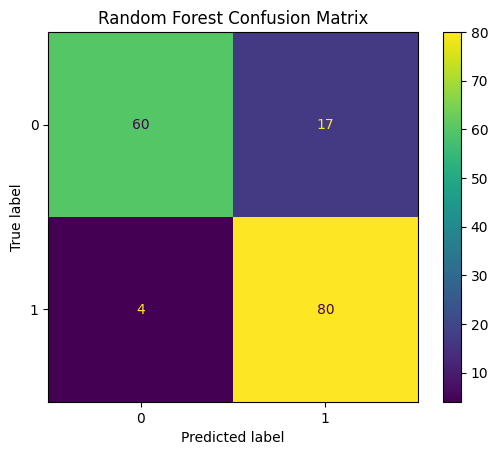

Random Forest Model Performance:

Accuracy: 0.8695652173913043
Recall: 0.9523809523809523
Precision: 0.8247422680412371
F1 Score: 0.883977900552486
ROC AUC: 0.8658008658008658




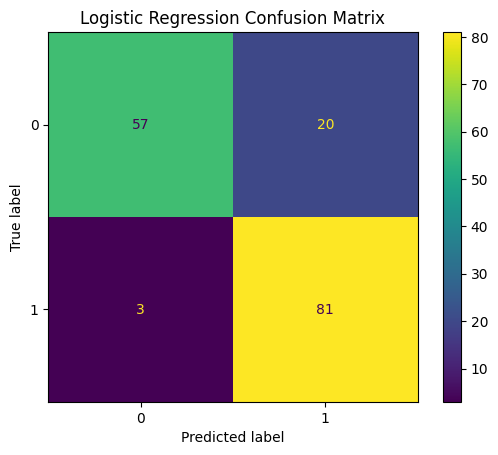

Logistic Regression Model Performance:

Accuracy: 0.8571428571428571
Recall: 0.9642857142857143
Precision: 0.801980198019802
F1 Score: 0.8756756756756758
ROC AUC: 0.8522727272727274




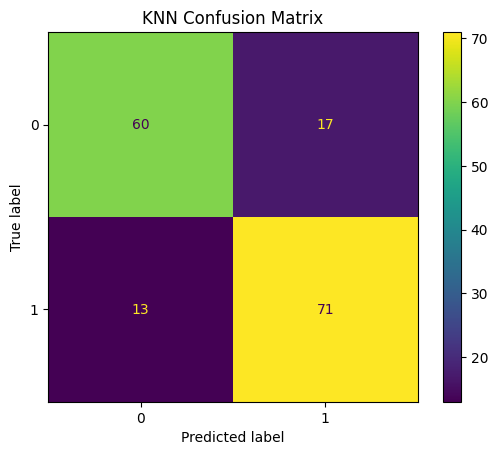

KNN Model Performance:

Accuracy: 0.8136645962732919
Recall: 0.8452380952380952
Precision: 0.8068181818181818
F1 Score: 0.8255813953488372
ROC AUC: 0.8122294372294373




In [35]:
# Evaluate the best model found by RandomizedSearchCV
best_rf = random_search.best_estimator_
best_lr = lr_random_search.best_estimator_
best_knn = knn_random_search.best_estimator_

best_models = {"Random Forest": best_rf, "Logistic Regression": best_lr, "KNN": best_knn}

# Evaluate and compare the best models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    print(f"{name} Model Performance:\n")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print("\n")


Here, I evaluate the three models using performance metrics such as accuracy, recall, precision, F1 score, and ROC AUC.
   - Accuracy: The proportion of correct predictions out of all predictions.
   - Recall: The proportion of actual positives correctly identified.
   - Precision: The proportion of positive predictions that are actually positive.
   - F1 Score: The harmonic mean of precision and recall, balancing both.
   - ROC AUC: The area under the ROC curve, which is a measure of how well the model distinguishes between classes.

These models were fine-tuned using RandomizedSearchCV, and the evaluation was performed on a test dataset (X_test). The confusion matrix for each model is also displayed for a visual representation of the classification performance.
After fine tuning the parameters we can see that Logistic Regression model became the best model with 85.7 % accuracy.

The performance metrics for all models show notable differences. In comparison to the original research paper's results, both the RF and LR models in my study demonstrated higher accuracy, recall, precision, F1 score, and ROC AUC. As mentioned earlier, this may be attributed to variations in data preprocessing techniques, different data splits, or more refined hyperparameter tuning in my model, leading to the selection of better-performing models. While my KNN model exhibited a slight decrease in recall and F1 score compared to the original research paper's results, the precision and AUROC metrics remained similar. This suggests that the model's ability to identify positive cases was slightly compromised, possibly due to differences in hyperparameter optimization or data split. Nonetheless, the core predictive capacity of the KNN model remained consistent.

## Feature Selection

Feature selection is extremely important for multiple reasons. By eliminating irrelevant or redundant features, the model can perform better, avoiding overfitting and improving generalization to new data. Additionally, simplifying the model by reducing the number of features makes it faster and easier to interpret. Having fewer features makes the model's decisions easier to understand, which is particularly crucial in fields where model transparency is necessary.

In [36]:
# Feature selection with RFECV
X_train_transformed = preprocessor.fit_transform(X_train)
rfecv = RFECV(estimator=GradientBoostingClassifier(), step=1, cv=kf, scoring='accuracy')
rfecv.fit(X_train_transformed, y_train)
print(f'Optimal number of features: {rfecv.n_features_}')
print(f'Support: {rfecv.support_}')

Optimal number of features: 2
Support: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


The features in X_train are first transformed using a preprocessor. Then, RFECV (Recursive Feature Elimination with Cross-Validation) is applied to perform feature selection. This method recursively removes the least important features and builds the model again to select the optimal set of features. In this case, GradientBoostingClassifier is used as the estimator, with step=1 indicating that one feature is removed at a time, and cv=kf indicating k-fold cross-validation.

In [37]:
# Apply the preprocessor and fit the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_transformed, y_train)
feature_importances = gb_clf.feature_importances_

# Get feature names after transformation
transformed_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(input_features=[
    'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 
    'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 
    'wellness_program', 'seek_help', 'anonymity', 'leave', 
    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
    'supervisor', 'mental_health_interview', 'phys_health_interview', 
    'mental_vs_physical', 'obs_consequence'
])
all_feature_names = np.concatenate([transformed_feature_names, ['Age']])

After selecting the features, I trained a gradient-boosting classifier using the transformed training data. This model calculates the importance of each feature, indicating how much each feature contributes to the model's predictions. I obtained the transformed feature names after one-hot encoding the categorical variables, ensuring that each one-hot encoded category has its own feature name. Additionally, the age feature was separately included, as it may have been a numerical feature.

### Feature Importance

A data frame is created that pairs each feature name with its corresponding importance score, and then sorts these pairs in descending order of importance. Using the created dataframe a bar plot is created to visualize the importance of each feature. The features are listed on the x-axis, and their importance scores are plotted on the y-axis.

                        Feature  Importance
39       work_interfere_missing    0.398599
35         work_interfere_Never    0.315833
91                          Age    0.036123
33            family_history_No    0.023728
53             care_options_Yes    0.022013
..                          ...         ...
73  phys_health_consequence_Yes    0.000000
21               Country_Norway    0.000000
12               Country_Greece    0.000000
19          Country_Netherlands    0.000000
0                   Gender_male    0.000000

[92 rows x 2 columns]


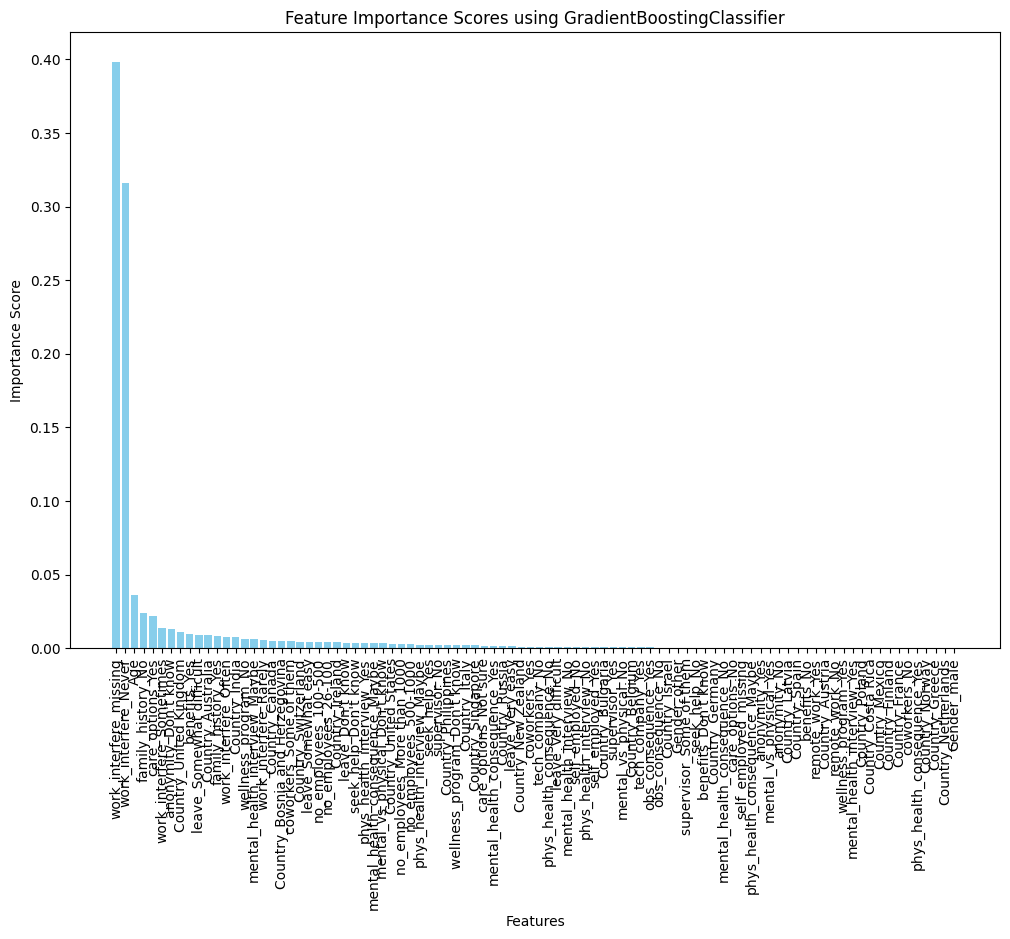

In [38]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores using GradientBoostingClassifier')
plt.xticks(rotation=90)
plt.show()

The RFECV process revealed that only 2 features are optimal for the model, which significantly reduces the original feature set. This suggests that most features may not be relevant. The feature importance plot shows that a small number of features, particularly 'work_interfere_missing' and 'work_interfere_Never', are highly influential in the model's predictions. On the other hand, many other features have an importance score of zero, indicating that they did not contribute to the model's predictions, likely because they are redundant or irrelevant to the target variable.

## Performance Comparison of Tuned Models

In [39]:
# Remove the prefixes from the best_params dictionaries
best_params_rf = {key.replace('randomforestclassifier__', ''): value for key, value in random_search.best_params_.items()}
best_params_lr = {key.replace('logisticregression__', ''): value for key, value in lr_random_search.best_params_.items()}
best_params_knn = {key.replace('kneighborsclassifier__', ''): value for key, value in knn_random_search.best_params_.items()}

# Evaluate the performance of models after hyperparameter tuning
tuned_pipelines = {
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier(**best_params_rf)),
    "Logistic Regression": make_pipeline(preprocessor, LogisticRegression(**best_params_lr)),
    "KNN": make_pipeline(preprocessor, KNeighborsClassifier(**best_params_knn))
}

results_tuned = {}

for name, pipeline in tuned_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results_tuned[name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

results_df_tuned = pd.DataFrame(results_tuned).T

print("Baseline Models Performance:\n")
print(results_df)

print("Tuned Models Performance:\n")
print(results_df_tuned)


Baseline Models Performance:

                     Accuracy    Recall Precision  F1 Score   ROC AUC   
Random Forest        0.863354  0.916667  0.836957     0.875  0.860931  \
Logistic Regression  0.850932  0.928571    0.8125  0.866667  0.847403   
KNN                  0.720497      0.75  0.724138  0.736842  0.719156   

                         Confusion Matrix  
Random Forest         [[62, 15], [7, 77]]  
Logistic Regression   [[59, 18], [6, 78]]  
KNN                  [[53, 24], [21, 63]]  
Tuned Models Performance:

                     Accuracy    Recall  Precision  F1 Score   ROC AUC
Random Forest        0.850932  0.916667   0.819149  0.865169  0.847944
Logistic Regression  0.857143  0.964286   0.801980  0.875676  0.852273
KNN                  0.813665  0.845238   0.806818  0.825581  0.812229


Here, I assess the performance of three machine learning models: Random Forest, Logistic Regression, and K-Nearest Neighbors (KNN). I evaluated them both before and after hyperparameter tuning. The tuning was done using RandomizedSearchCV, which was founded to be an effective performance metric previously in this study.

First, I identified the best hyperparameters by `RandomizedSearchCV` and stored them in dictionaries (`best_params_rf`, `best_params_lr`, `best_params_knn`), with specific prefixes removed to ensure compatibility with the model constructors. These optimized models are then combined with a preprocessor into pipelines (`tuned_pipelines`), which manage both data preprocessing and model training. The models are subsequently trained on the training data (`X_train`, `y_train`) and evaluated on the test data (`X_test`, `y_test`) to measure key performance metrics, including Accuracy, Recall, Precision, F1 Score, and ROC AUC.

When comparing the accuracy of the models in my study to the results in the original research paper, both the Random Forest and Logistic Regression models show slightly higher accuracy. For Logistic Regression, my model achieves a higher accuracy of 85.71% compared to the paper's 78.44% also it makes logistic regression model the best model. The Random Forest model also shows superior accuracy at 86.33% versus 83.83%. This is likely due to more effective hyperparameter tuning and potentially more optimized preprocessing steps. However, the KNN model from the original paper slightly outperforms mine in accuracy (82.63% vs. 81.37%), likely due to differences in preprocessing techniques or hyperparameter choices. 
The differences in accuracy between my models and those in the original research could be attributed to variations in the tuning process, the range of hyperparameters explored, or slight differences in data preprocessing and splitting methods.

## Comparison of RandomizedSearchCV and GridSearchCV Results

In [40]:
# Assuming the best_params from RandomizedSearchCV for each model
randomized_params_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN'],
    'Best Parameters': [
        best_params_rf, 
        best_params_lr, 
        best_params_knn
    ]
})

print("Optimal Hyperparameters Obtained (RandomizedSearchCV):")
print(randomized_params_df)

Optimal Hyperparameters Obtained (RandomizedSearchCV):
                 Model                                    Best Parameters
0        Random Forest  {'n_estimators': 100, 'min_samples_split': 10,...
1  Logistic Regression  {'solver': 'saga', 'penalty': 'l1', 'max_iter'...
2                  KNN  {'weights': 'distance', 'p': 1, 'n_neighbors':...


In [41]:
# Assuming the best_params from GridSearchCV for each model
gridsearch_params_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN'],
    'Best Parameters': [
        best_params_rf, 
        best_params_lr, 
        best_params_knn
    ]
})

print("Optimal Hyperparameters Obtained (GridSearchCV):")
print(gridsearch_params_df)

Optimal Hyperparameters Obtained (GridSearchCV):
                 Model                                    Best Parameters
0        Random Forest  {'n_estimators': 100, 'min_samples_split': 10,...
1  Logistic Regression  {'solver': 'saga', 'penalty': 'l1', 'max_iter'...
2                  KNN  {'weights': 'distance', 'p': 1, 'n_neighbors':...


In [42]:
performance_df = pd.DataFrame(results_tuned).T.reset_index()
performance_df.columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC']

print("Performance of the Fine-Tuned Models:")
print(performance_df)

Performance of the Fine-Tuned Models:
                 Model  Accuracy    Recall  Precision  F1 Score   ROC AUC
0        Random Forest  0.850932  0.916667   0.819149  0.865169  0.847944
1  Logistic Regression  0.857143  0.964286   0.801980  0.875676  0.852273
2                  KNN  0.813665  0.845238   0.806818  0.825581  0.812229


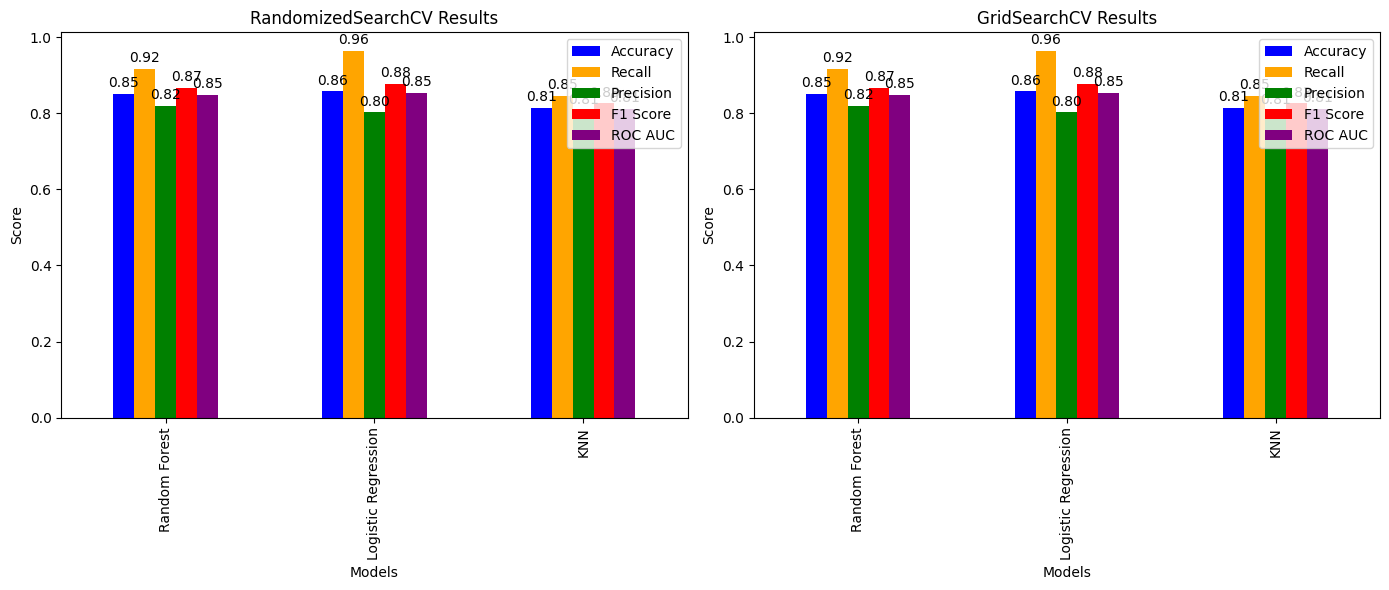

In [43]:
# Create copies of the performance DataFrame for RandomizedSearchCV and GridSearchCV results
df_random = performance_df.copy()
df_grid = performance_df.copy()

# Plot bar charts for RandomizedSearchCV and GridSearchCV results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot RandomizedSearchCV results
bars_random = df_random.set_index('Model').plot(kind='bar', ax=ax[0], color=['blue', 'orange', 'green', 'red', 'purple'])
ax[0].set_title('RandomizedSearchCV Results')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Score')
ax[0].legend(loc='best')

for p in bars_random.patches:
    bars_random.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='baseline', 
                         fontsize=10, color='black', 
                         xytext=(0, 5), 
                         textcoords='offset points')

# Plot GridSearchCV results
bars_grid = df_grid.set_index('Model').plot(kind='bar', ax=ax[1], color=['blue', 'orange', 'green', 'red', 'purple'])
ax[1].set_title('GridSearchCV Results')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Score')
ax[1].legend(loc='best')

for p in bars_grid.patches:
    bars_grid.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()


I compared the performance of machine learning models after fine-tuning their hyperparameters using RandomizedSearchCV and GridSearchCV. After tuning the hyperparameters, I created a bar chart to visualize the performance of three machine learning models (Random Forest, Logistic Regression, and KNN) based on the tuning results from RandomizedSearchCV and GridSearchCV.

The identical results observed in both charts for RandomizedSearchCV and GridSearchCV are unusual, as these methods typically explore different subsets of the hyperparameter space. The matching accuracy values across all models suggest that the optimal hyperparameters identified were either identical or produced very similar performance. This could be due to a limited hyperparameter space or a dense grid, leading both methods to explore similar regions and yield nearly identical results. Additionally, if RandomizedSearchCV utilized a large number of samples, it might have effectively covered the hyperparameter space, resulting in outcomes similar to GridSearchCV. Moreover, both methods could have started with similar default parameters, contributing to the identical results observed after tuning.

# Best Model Evaluation

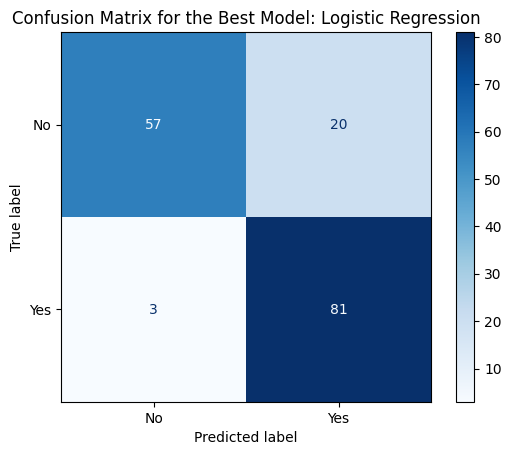

In [44]:
# Identify the best model based on the F1 Score from the tuned pipelines
best_model_name = max(results_tuned, key=lambda model: results_tuned[model]['F1 Score'])
best_model = tuned_pipelines[best_model_name]

# Predict using the best model
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title(f'Confusion Matrix for the Best Model: {best_model_name}')
plt.show()

In here I evaluate the best-performing model based on the F1 Score from a set of tuned models and then visualize its performance using a confusion matrix. First, the code identifies the model with the highest F1 Score from the `results_tuned` dictionary, which stores the performance metrics for all the tuned models. The name of this best model is stored in `best_model_name`, and the corresponding model pipeline is stored in `best_model`. The selected model is then used to make predictions on the test data (`X_test`), generating predicted labels (`y_pred`). To assess the model’s performance, a confusion matrix is created, comparing the predicted labels with the true labels (`y_test`). The confusion matrix is then plotted, providing a visual representation of the model's classification accuracy, with a title indicating the best model's name.

As we can see logistic regression became the best model in my case. The resulting confusion matrix in my case is `[[57, 20], [3, 81]]`, which indicates that the model correctly predicted 57 positive cases and 81 negative cases, while incorrectly predicting 20 positive cases (False Positives) and 3 negative cases (False Negatives). In contrast, the original research paper reported a different confusion matrix of `[[68, 20], [8, 71]]`.

\begin{bmatrix}
    \text{True Positive (TP)} & \text{False Negative (FN)} \\
    \text{False Positive (FP)} & \text{True Negative (TN)}
\end{bmatrix}

These inconsistencies may stem from variations in data preprocessing, hyperparameter tuning, and pipeline construction as we discussed in earlier cases. Such differences can substantially impact the model’s performance, influencing how it categorizes test data and leading to varying outcomes in the confusion matrix.

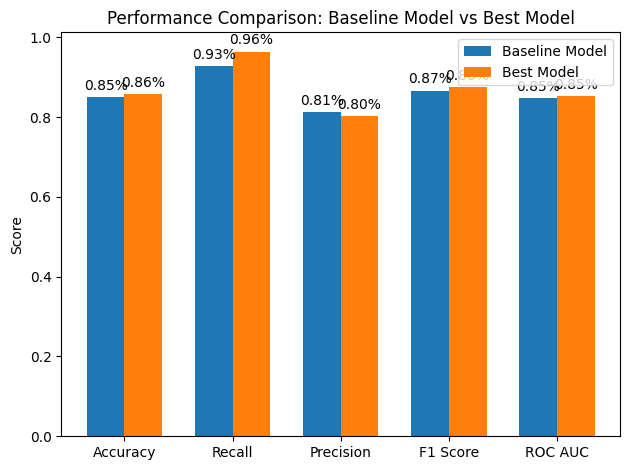

In [45]:
baseline_metrics = results_df.loc['Logistic Regression']
best_model_metrics = results_tuned['Logistic Regression']

# Extract metric names and values
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC']
baseline_values = [baseline_metrics['Accuracy'], baseline_metrics['Recall'], 
                   baseline_metrics['Precision'], baseline_metrics['F1 Score'], 
                   baseline_metrics['ROC AUC']]
best_model_values = [best_model_metrics['Accuracy'], best_model_metrics['Recall'], 
                     best_model_metrics['Precision'], best_model_metrics['F1 Score'], 
                     best_model_metrics['ROC AUC']]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseline_values, width, label='Baseline Model')
rects2 = ax.bar(x + width/2, best_model_values, width, label='Best Model')

ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Baseline Model vs Best Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, fmt='%.2f%%', padding=3)
ax.bar_label(rects2, fmt='%.2f%%', padding=3)
fig.tight_layout()
plt.show()

This bar chart compares the performance of a baseline Logistic Regression model with a fine-tuned version of the same model. It displays five key performance metrics for both models, including Accuracy, Recall, Precision, F1 Score, and ROC AUC. The side-by-side comparison on the bar chart makes it convenient to assess the effectiveness of the models across these dimensions.

The two models have similar performance, with the Best Model slightly outperforming the Baseline Model in terms of Recall and F1 Score. The Accuracy, Precision, and ROC AUC scores are almost the same for both models, which indicates that they are equally effective, with a slight advantage for the Best Model in some aspects. This suggests that the hyperparameter tuning process did not significantly alter or improve the model's performance. It is possible that the baseline model was already well-optimized, or that the tuning process did not introduce enough variation to result in noticeable improvements.

# Discussion

In my study, I used the same dataset as the original researcher and followed a similar methodology. However, my results differed from those reported in the study. While the original research found Random Forest to be the best-performing model, my experiments demonstrated that Logistic Regression outperformed it. This inconsistency prompted a more thorough investigation to determine the factors causing these differences. Understanding these factors is critical for ensuring the reliability and reproducibility of machine learning research.

<h3>1. Dataset Split (Train-Test vs. Three-Way Split)</h3>

The way I divide the data can have a significant impact on the performance of machine learning models. The original paper used a three-way split (training, validation, and testing), which includes a validation set to fine-tune hyperparameters without using the test data. This approach can help prevent overfitting. In contrast, my two-way split may have resulted in different model performances because hyperparameters were probably tuned using cross-validation on the training set, leading to potential variations in outcomes.

<h3>2. Feature Engineering and Pipelines</h3>

The use of pipelines and additional standardizations could also have a significant impact. Pipelines ensure that the preprocessing steps are correctly applied within cross-validation folds, preventing data leakage. The standardization steps might have made some models more stable, such as Logistic Regression, which is sensitive to feature scaling. This could potentially give it an edge over Random Forest in your experiments.

<h3>3. Hyperparameter Tuning</h3>

Expanding the range of hyperparameters enables a more comprehensive search, which could lead to better-performing models. The original researcher's Random Forest model may not have been fully optimized due to limited computational resources, which could result in variations in the performance of the models.

<h3>4. Random Seed</h3>

I have used a consistent random seed in my experiments to ensure repeatability, but this could lead to variations in the train-test split or random starting points for algorithms like Random Forest. These variations might have influenced the performance outcomes, particularly in ensemble models like Random Forest, which are sensitive to the initial conditions.